In [10]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# spliting into training and testing
from sklearn.model_selection import train_test_split


OptionError: Pattern matched multiple keys

In [12]:
pd.set_option('display.max_columns', 60) # show all 60 columns 


In [13]:
# read df
df = pd.read_csv('../data/energy.csv')

# top 5 rows 
df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

## Handling missing values 
 some entries are listed as 'Not Available'; instead it may be converted to null 


In [17]:
# replace all occurences of 'Not Available' to null
df = df.replace('Not Available', np.nan)


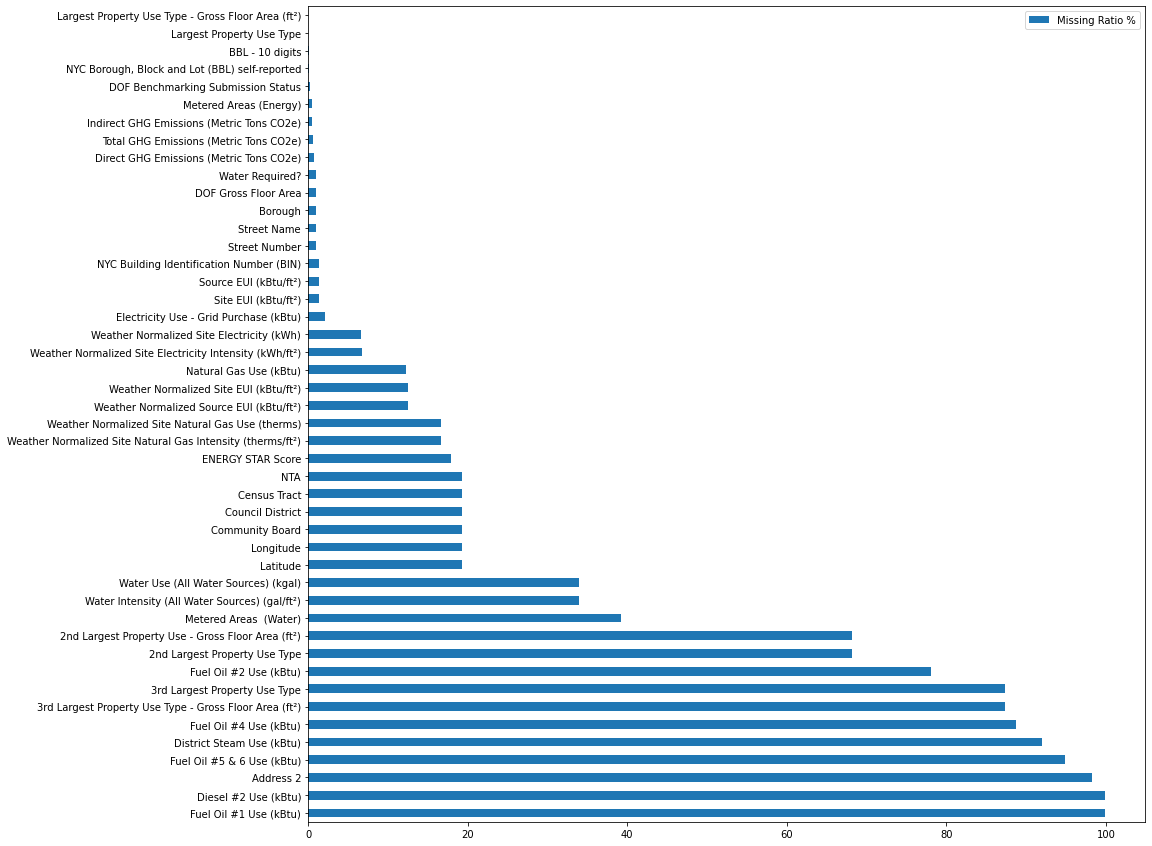

In [24]:
# visualize the ratio of nulls in each columns
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100     # the ratio of np.nan
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False) # drop columns with no null and sort
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh", figsize = (15,15)) 
        
        plt.show()
        
    else:
        print('No NAs found')
plot_nas(df)

# https://stackoverflow.com/questions/69537383/how-to-plot-count-of-null-values-for-each-column-in-pandas-dataframe

here, I will drop those columns with missing values >= 60% since they are too sparse to be included in the analysis


In [40]:
na_df = (df.isnull().sum() / len(df)) * 100     # the ratio of np.nan
na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False) # drop columns with no null and sort
na_index = na_df[na_df > 60].index # get the index that nullratio > 60%

df.drop(na_index, axis = 1, inplace = True) # axis=1 drop by columns, inplace=True to modify the df

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,1963,2,100,Whole Building,NaN,NaN,305.6,303.1,37.8,NaN,614.2,NaN,NaN,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,NaN,NaN,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,NaN,NaN,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,1924,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,231342,NaN,NaN,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1305748,1971,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1305748,NaN,NaN,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,10032,193,FT WASHINGTON AVENUE,Manhattan,211400.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),179694,1932,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,179694,NaN,NaN,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


## Convert data types 
- so many columns are object type and need to convert to numerical type inorder to do analysis

In [41]:
# Iterate through the columns
for col in list(df.columns):
    # Select columns that should be numeric
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Convert the data type to float
        df[col] = df[col].astype(float)


- convert columns to categorical

In [96]:
pd.concat([df.dtypes, df.nunique()], axis = 1)

,0,1
Order,int64,11746
Property Id,int64,11746
Property Name,object,11740
Parent Property Id,object,102
Parent Property Name,object,103
BBL - 10 digits,object,11580
"NYC Borough, Block and Lot (BBL) self-reported",object,11581
NYC Building Identification Number (BIN),object,11507
Address 1 (self-reported),object,11645
Postal Code,object,286


In [84]:
df['Water Required?'] = df['Water Required?'].astype('category')
df['Borough'] =df['Borough'].astype('category')


,0,1
Order,int64,11746
Property Id,int64,11746
Property Name,object,11740
Parent Property Id,object,102
Parent Property Name,object,103
BBL - 10 digits,object,11580
"NYC Borough, Block and Lot (BBL) self-reported",object,11581
NYC Building Identification Number (BIN),object,11507
Address 1 (self-reported),object,11645
Postal Code,object,286


convert Release Date(object) to date 

In [94]:
df['Release Data'] = pd.to_datetime(df['Release Date'],dayfirst = False, yearfirst = False, format = '%m/%d/%Y %I:%M:%S %p')
# https://docs.python.org/3/library/time.html#time.strftime
# %I for 12-hour clock + %p for AM, PM

convert to date type

## Exploratory Data Analysis (EDA)
- find anomalies, patterns and apply transformation if neccesary
- The target we want to predict is ENERGY STAR Score (0 ~ 100)

In [97]:
df = df.rename(columns = {'ENERGY STAR Score': 'score'}) # rename it to simplify
df.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,11746.000000,11746.000000,11746.000000,9642.000000,11583.000000,10281.000000,10959.000000,9783.000000,10281.000000,1.030400e+04,9.784000e+03,1.150200e+04,1.096000e+04,1.167200e+04,1.166300e+04,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,1948.738379,1.289971,98.762557,59.854594,280.071484,309.747466,11.072643,1.901441,417.915709,5.048545e+07,5.364578e+05,5.965472e+06,1.768752e+06,4.553657e+03,2.477937e+03,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,30.576386,4.017484,7.501603,29.993586,8607.178877,9784.731207,127.733868,97.204587,10530.524339,3.914719e+09,4.022606e+07,3.154430e+07,9.389154e+06,2.041639e+05,1.954498e+05,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,1927.000000,1.000000,100.000000,37.000000,61.800000,65.100000,3.800000,0.100000,103.500000,1.098251e+06,1.176952e+04,1.043673e+06,3.019975e+05,3.287000e+02,1.474500e+02,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,1941.000000,1.000000,100.000000,65.000000,78.500000,82.500000,5.300000,0.500000,129.400000,4.103962e+06,4.445525e+04,1.855196e+06,5.416312e+05,5.002500e+02,2.726000e+02,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,1966.000000,1.000000,100.000000,85.000000,97.600000,102.500000,9.200000,0.700000,167.200000,6.855070e+06,7.348107e+04,4.370302e+06,1.284677e+06,9.084250e+02,4.475000e+02,4.249000e+02,1.584140e+05,8.031875e+03,70.805000,162.750000,40.817623,-73.932443,9.000000,33.000000,531.500000
max,14993.000000,5.991312e+06,1.354011e+07,1.421712e+07,2019.000000,161.000000,100.000000,100.000000,869265.000000,939329.000000,6259.400000,9393.000000,986366.000000,3.942852e+11,3.942852e+09,1.691763e+09,4.958273e+08,2.094340e+07,2.094340e+07,4.764375e+06,1.421712e+07,6.594604e+06,96305.690000,912801.100000,40.912869,-73.715543,56.000000,51.000000,155101.000000


Text(0, 0.5, 'Number of Builings')

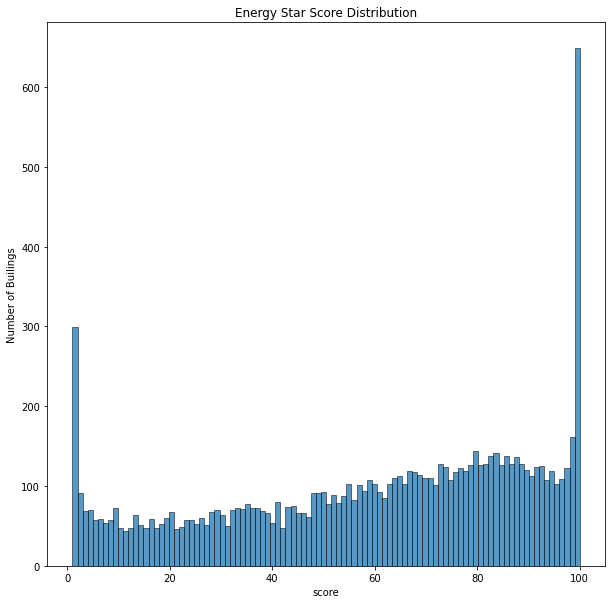

In [122]:
plt.figure(figsize=(10,10))
f = sns.histplot(data = df, x = df.score, bins= 100)
f.set_title('Energy Star Score Distribution')
f.set_ylabel('Number of Builings')


Energy Star Score is a pencentile rank and thus we should see a flat distribution. However, the data suggests that the data is heavily concentrated around 0 or 100. This may due to the fact that this score is self-reported.

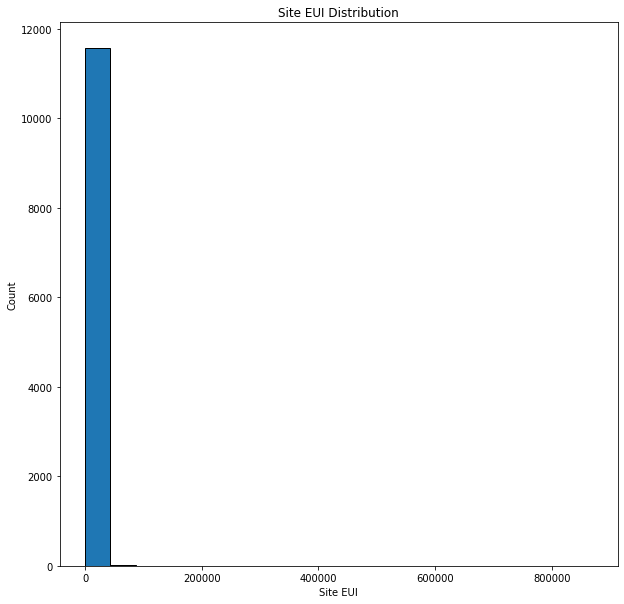

In [123]:
plt.figure(figsize=(10,10))
plt.hist(df['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); 
plt.title('Site EUI Distribution');


The plot shows that Site EUI is heavily scewed due to having a outliers


In [124]:
df.describe()['Site EUI (kBtu/ft²)']

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

The significant higher mean= 280 over median = 78 and the maximum value = 869265 suggest that this columns is heavily affected by an outlier

In [140]:
df['Site EUI (kBtu/ft²)'].dropna().sort_values(ascending = False)

8068     869265.0
7        143974.4
3898     126307.4
8174     112173.6
8268     103562.7
           ...   
10041         0.0
127           0.0
11391         0.0
54            0.0
60            0.0
Name: Site EUI (kBtu/ft²), Length: 11583, dtype: float64

Looking closely to the value that is far from others

In [144]:
df.loc[df['Site EUI (kBtu/ft²)'].dropna().sort_values(ascending = False).index[0]]

Order                                                                                                        10
Property Id                                                                                             2610789
Property Name                                                                                North Shore Towers
Parent Property Id                                                                                      2610789
Parent Property Name                                                                         North Shore Towers
BBL - 10 digits                                                                                      4084890001
NYC Borough, Block and Lot (BBL) self-reported                                                       4084890001
NYC Building Identification Number (BIN)                                        4456886;4456885;4453535;4456888
Address 1 (self-reported)                                                          270-10 Grand Central 

In [147]:

# Calculate first and third quartile
first_quartile = df['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = df['Site EUI (kBtu/ft²)'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
df = df[(df['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (df['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]



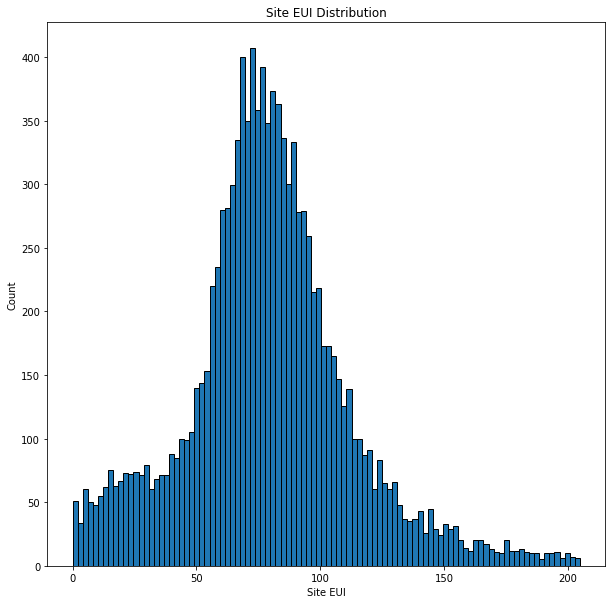

In [149]:
plt.figure(figsize=(10,10))
plt.hist(df['Site EUI (kBtu/ft²)'].dropna(), bins = 100, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); 
plt.title('Site EUI Distribution');

Now the distributions looks like normal distribution and thus better for further analysis such as regression

Text(0.5, 1.0, 'Density plof of Scores by Borough')

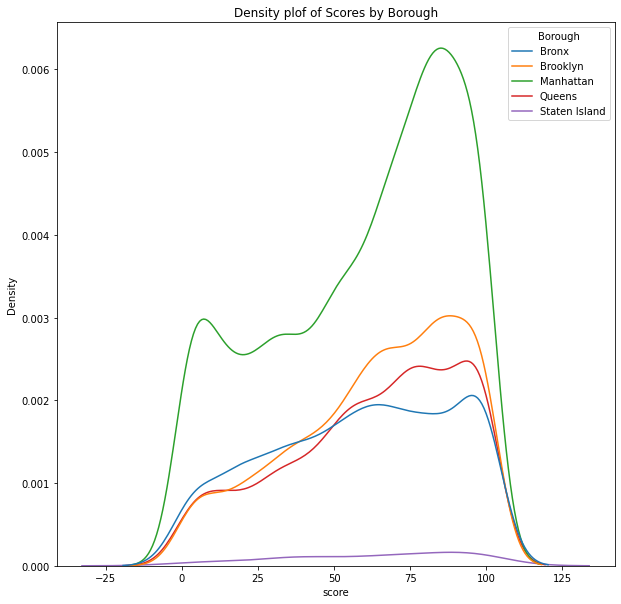

In [157]:
score_clean = df.dropna(subset= ['score'])
plt.figure(figsize=(10,10))
sns.kdeplot(data = score_clean, x = 'score', hue= score_clean['Borough'])
plt.title('Density plof of Scores by Borough')